In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open(r"C:\Users\himan\Music\2.1 UNZIP_ME_FOR_NOTEBOOKS_V4\DATA\Ames_Housing_Feature_Description.txt", 'r') as f:
    print(f.read())


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
df = pd.read_csv("../Feature Engineering/House_Data_withou_Outliers")

In [4]:
#df.info()

In [5]:
df.head()

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
df.drop("PID",axis=1)
#df.drop("Unnamed:",axis=1)

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2923,2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2924,2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2925,2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [7]:
len(df.columns)

82

In [8]:
100 * df.isnull().sum() / len(df)

Unnamed: 0         0.00000
PID                0.00000
MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 82, dtype: float64

In [9]:
 def percent_missing(df):
        percent_nan = 100 * df.isnull().sum() / len(df)
        percent_nan = percent_nan[percent_nan > 0].sort_values()
        
        return percent_nan

In [10]:
percent_nan = percent_missing(df)

In [11]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

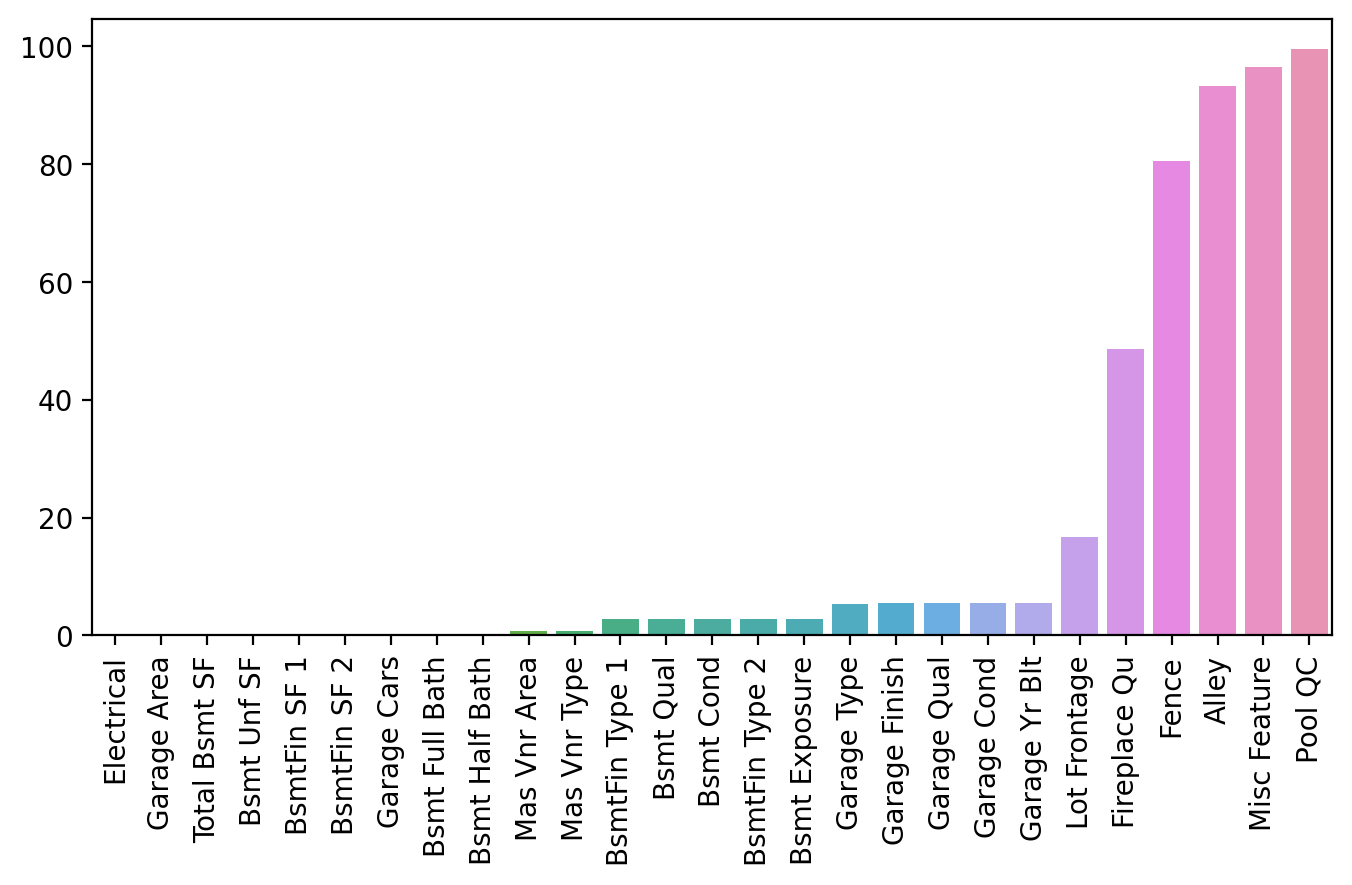

In [12]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);


(0.0, 1.0)

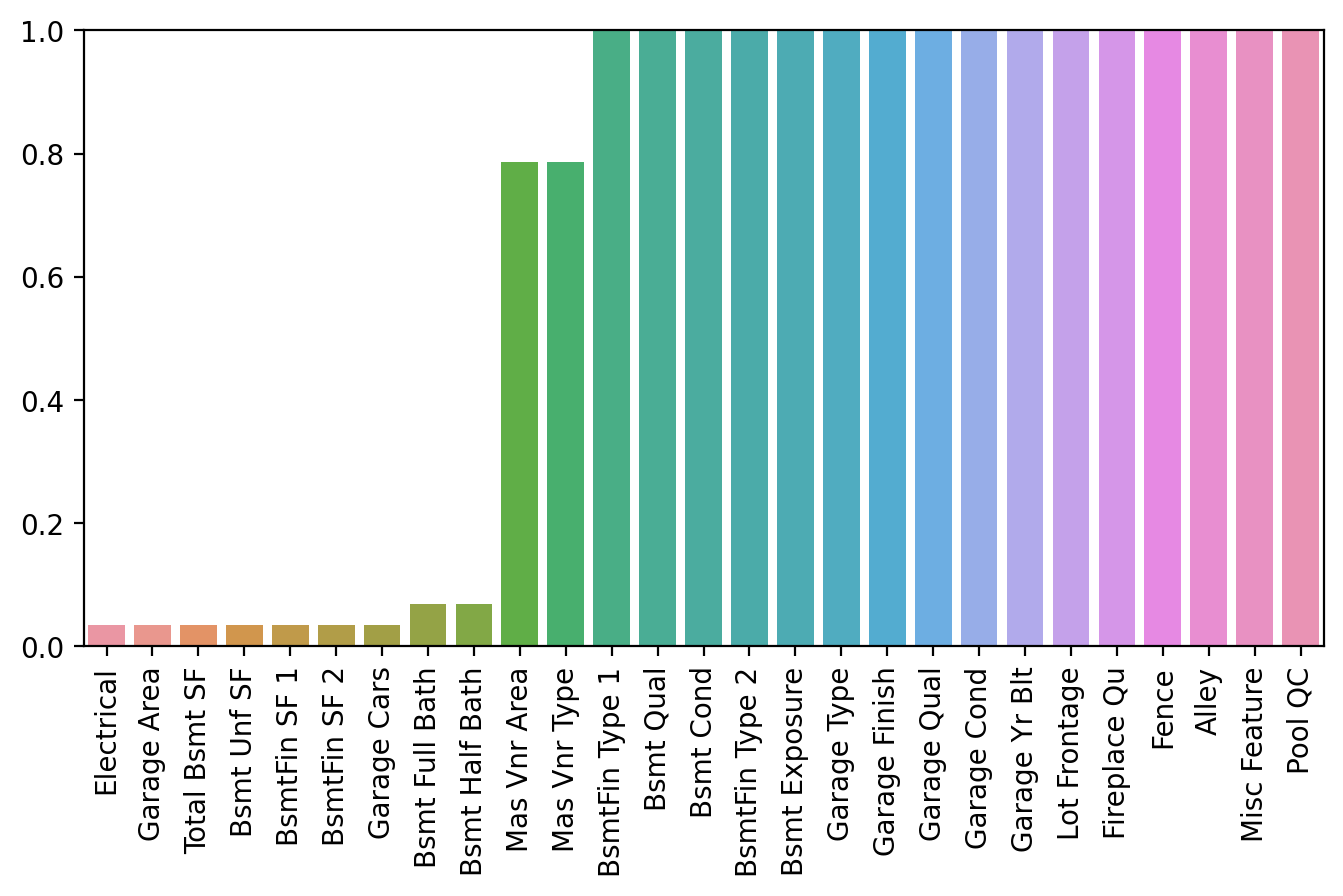

In [13]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [14]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [15]:
100/len(df)

0.0341646737273659

In [16]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [17]:
df[df['Bsmt Full Bath'].isnull()]

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1497,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [18]:
df = df.dropna(axis=0,subset=['Electrical','Garage Area'])

In [19]:
percent_nan = percent_missing(df)

In [20]:
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

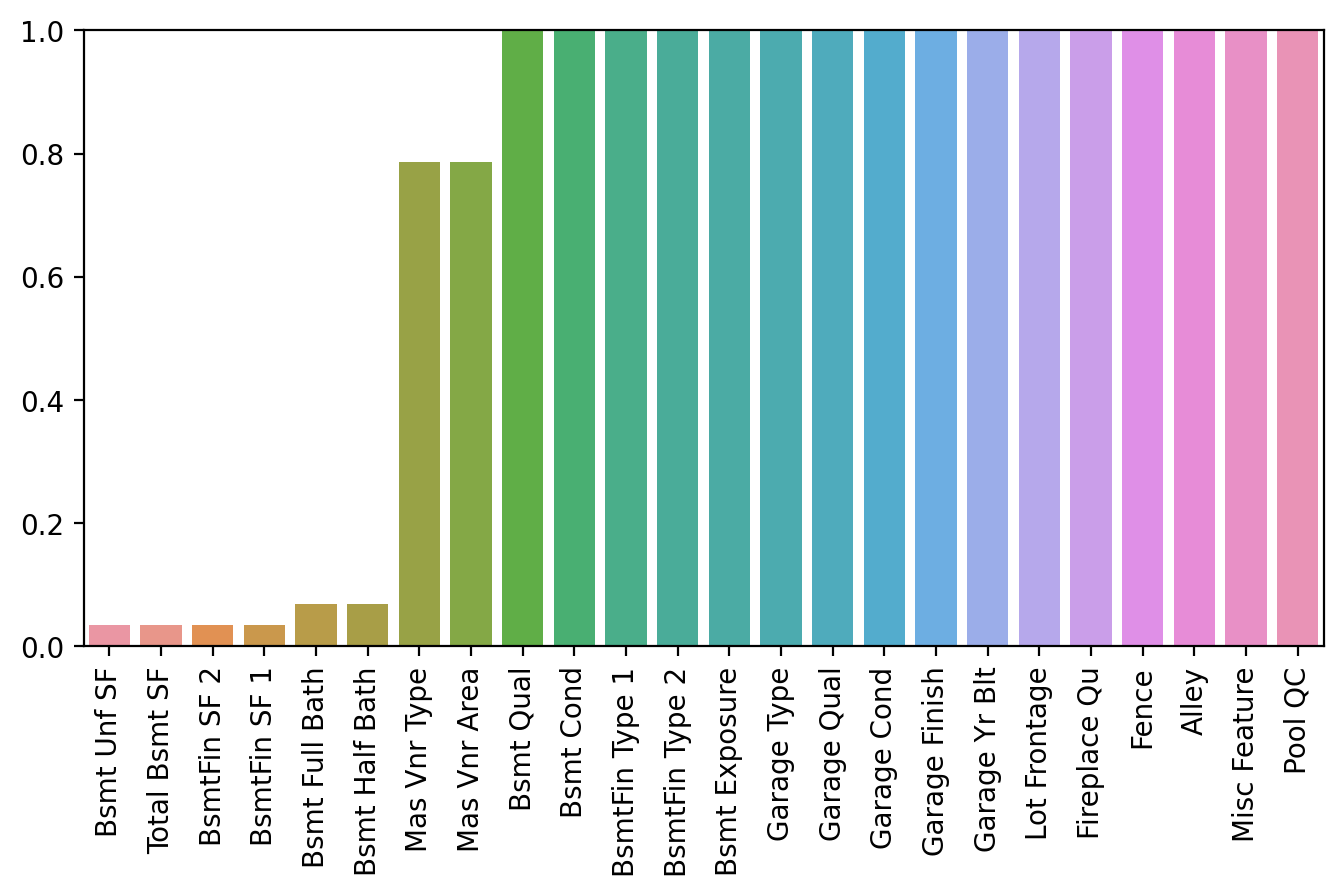

In [21]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [22]:
df[df['Bsmt Half Bath'].isnull()]

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1497,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [23]:
df[df['Bsmt Full Bath'].isnull()]

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1497,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [24]:
df[df['Bsmt Unf SF'].isnull()]

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [25]:
#BSMT NUMERIC COLUMNS --> FILLNA 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

#BSMT STRING COLUMNS --> NONE
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [26]:
df[df['Bsmt Full Bath'].isnull()]

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


(0.0, 1.0)

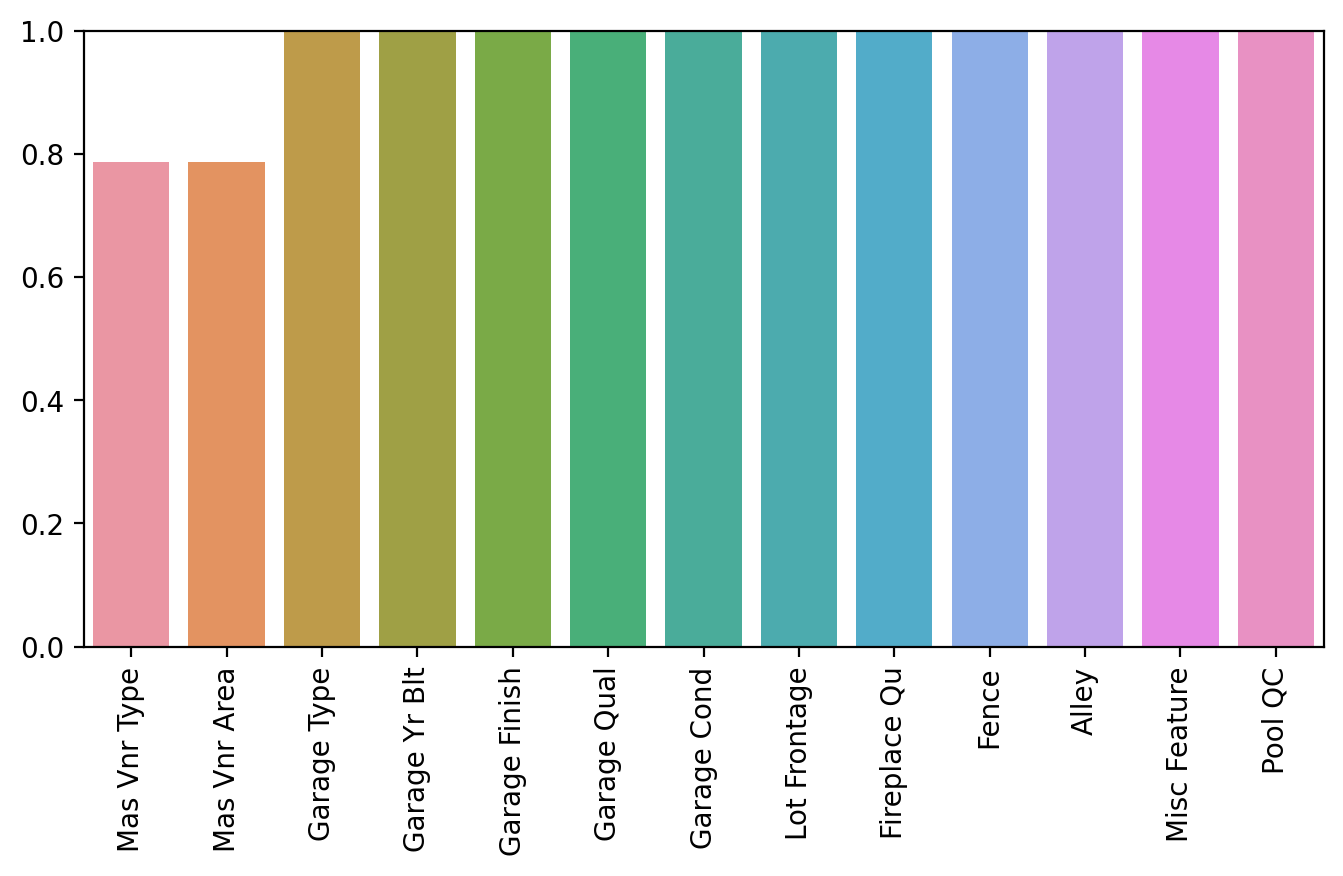

In [27]:
percent_nan = percent_missing(df)

plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [28]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna("None")

In [29]:
    df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [30]:
percent_nan = percent_missing(df)

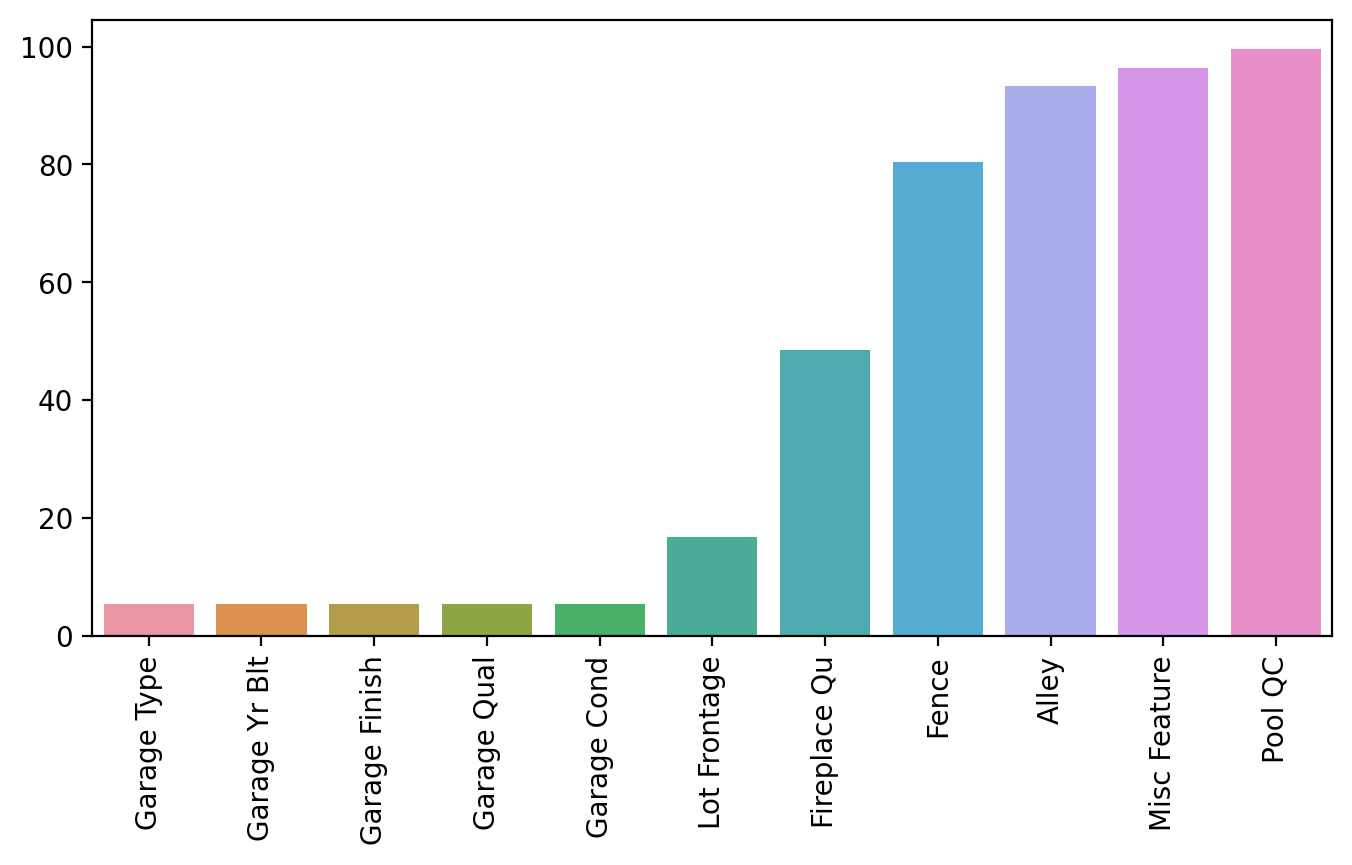

In [31]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
#plt.ylim(0,1)

In [32]:
#fix data based on columns

In [33]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [34]:
percent_nan = percent_missing(df)

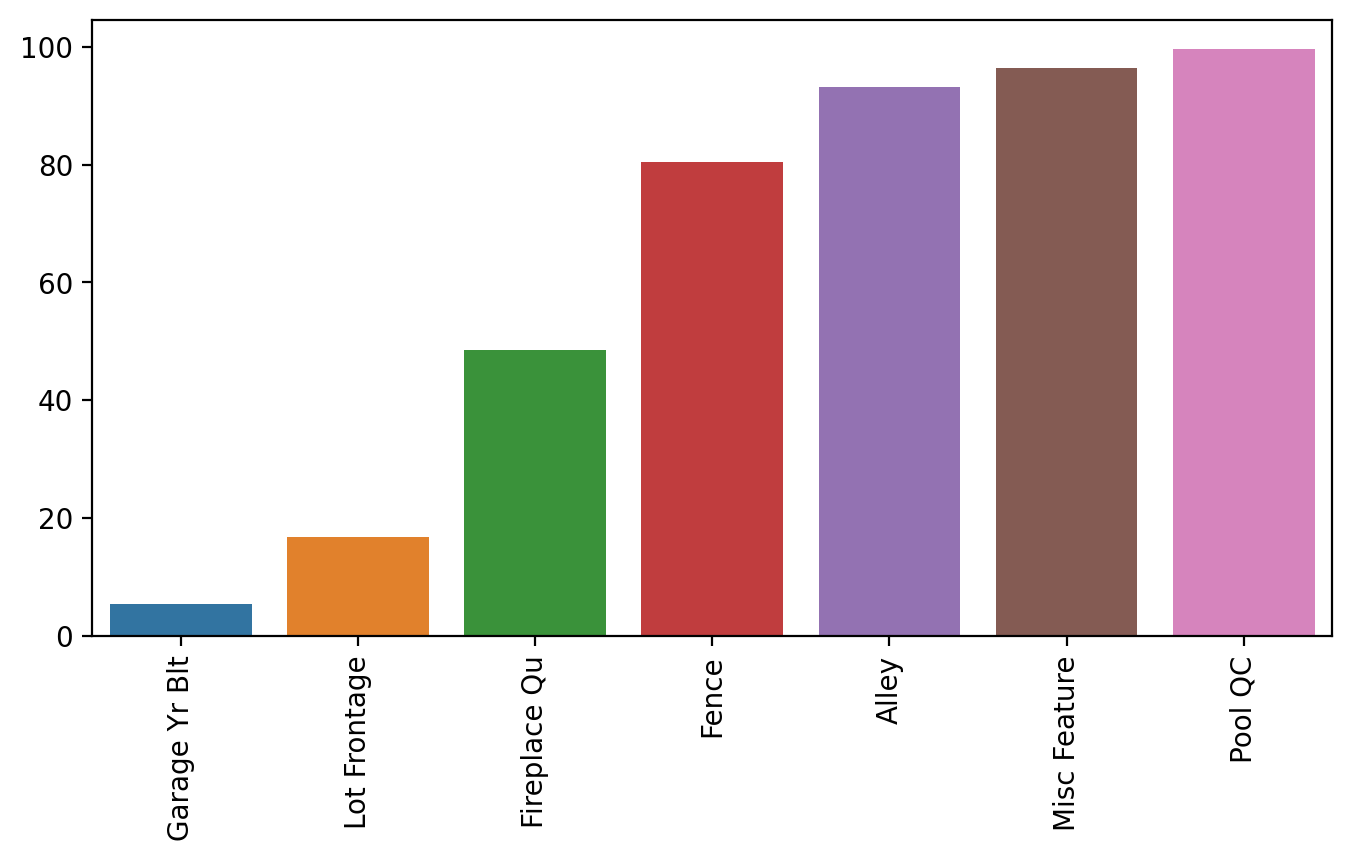

In [38]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
#plt.ylim(0,1)

In [36]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [37]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [39]:
percent_nan = percent_missing(df)

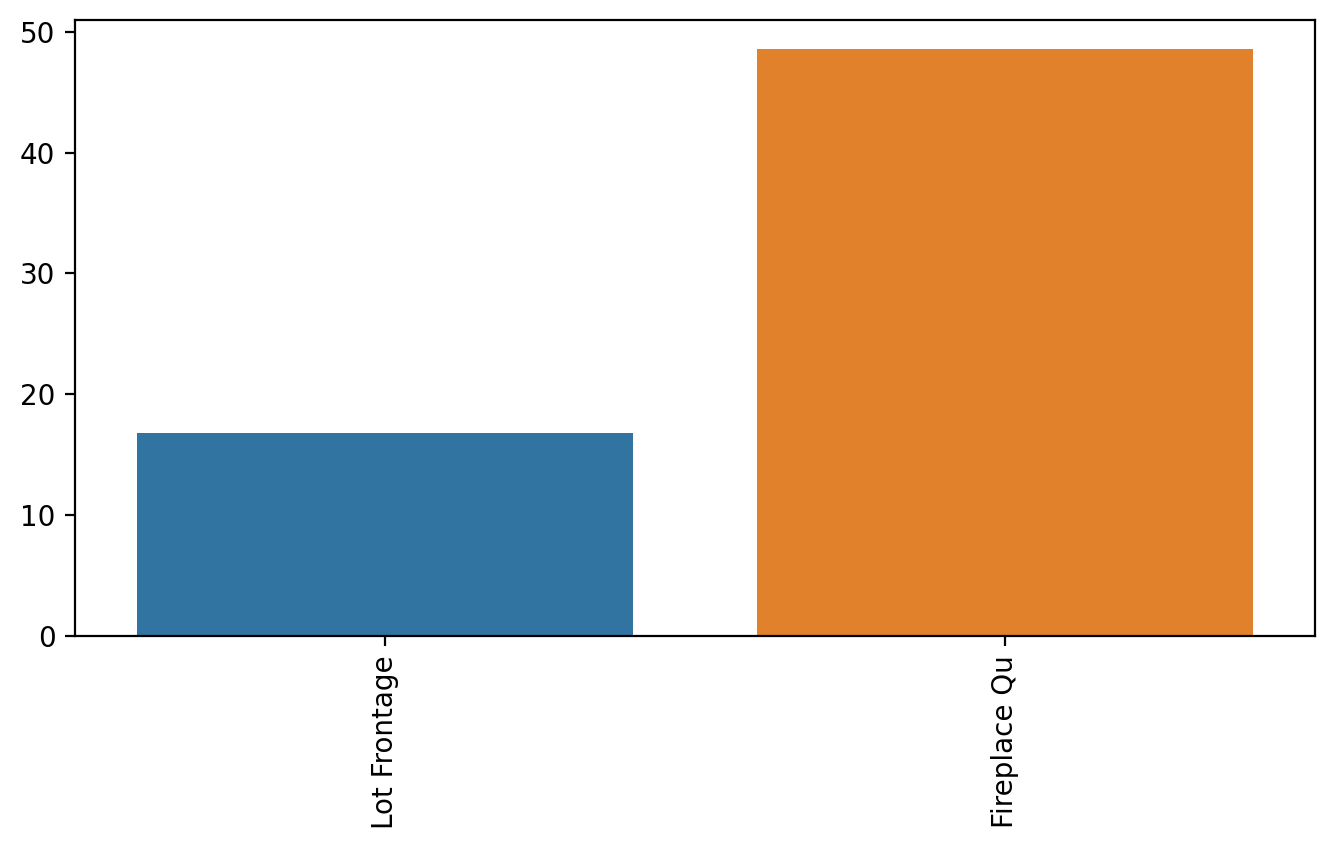

In [40]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [43]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [44]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [45]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

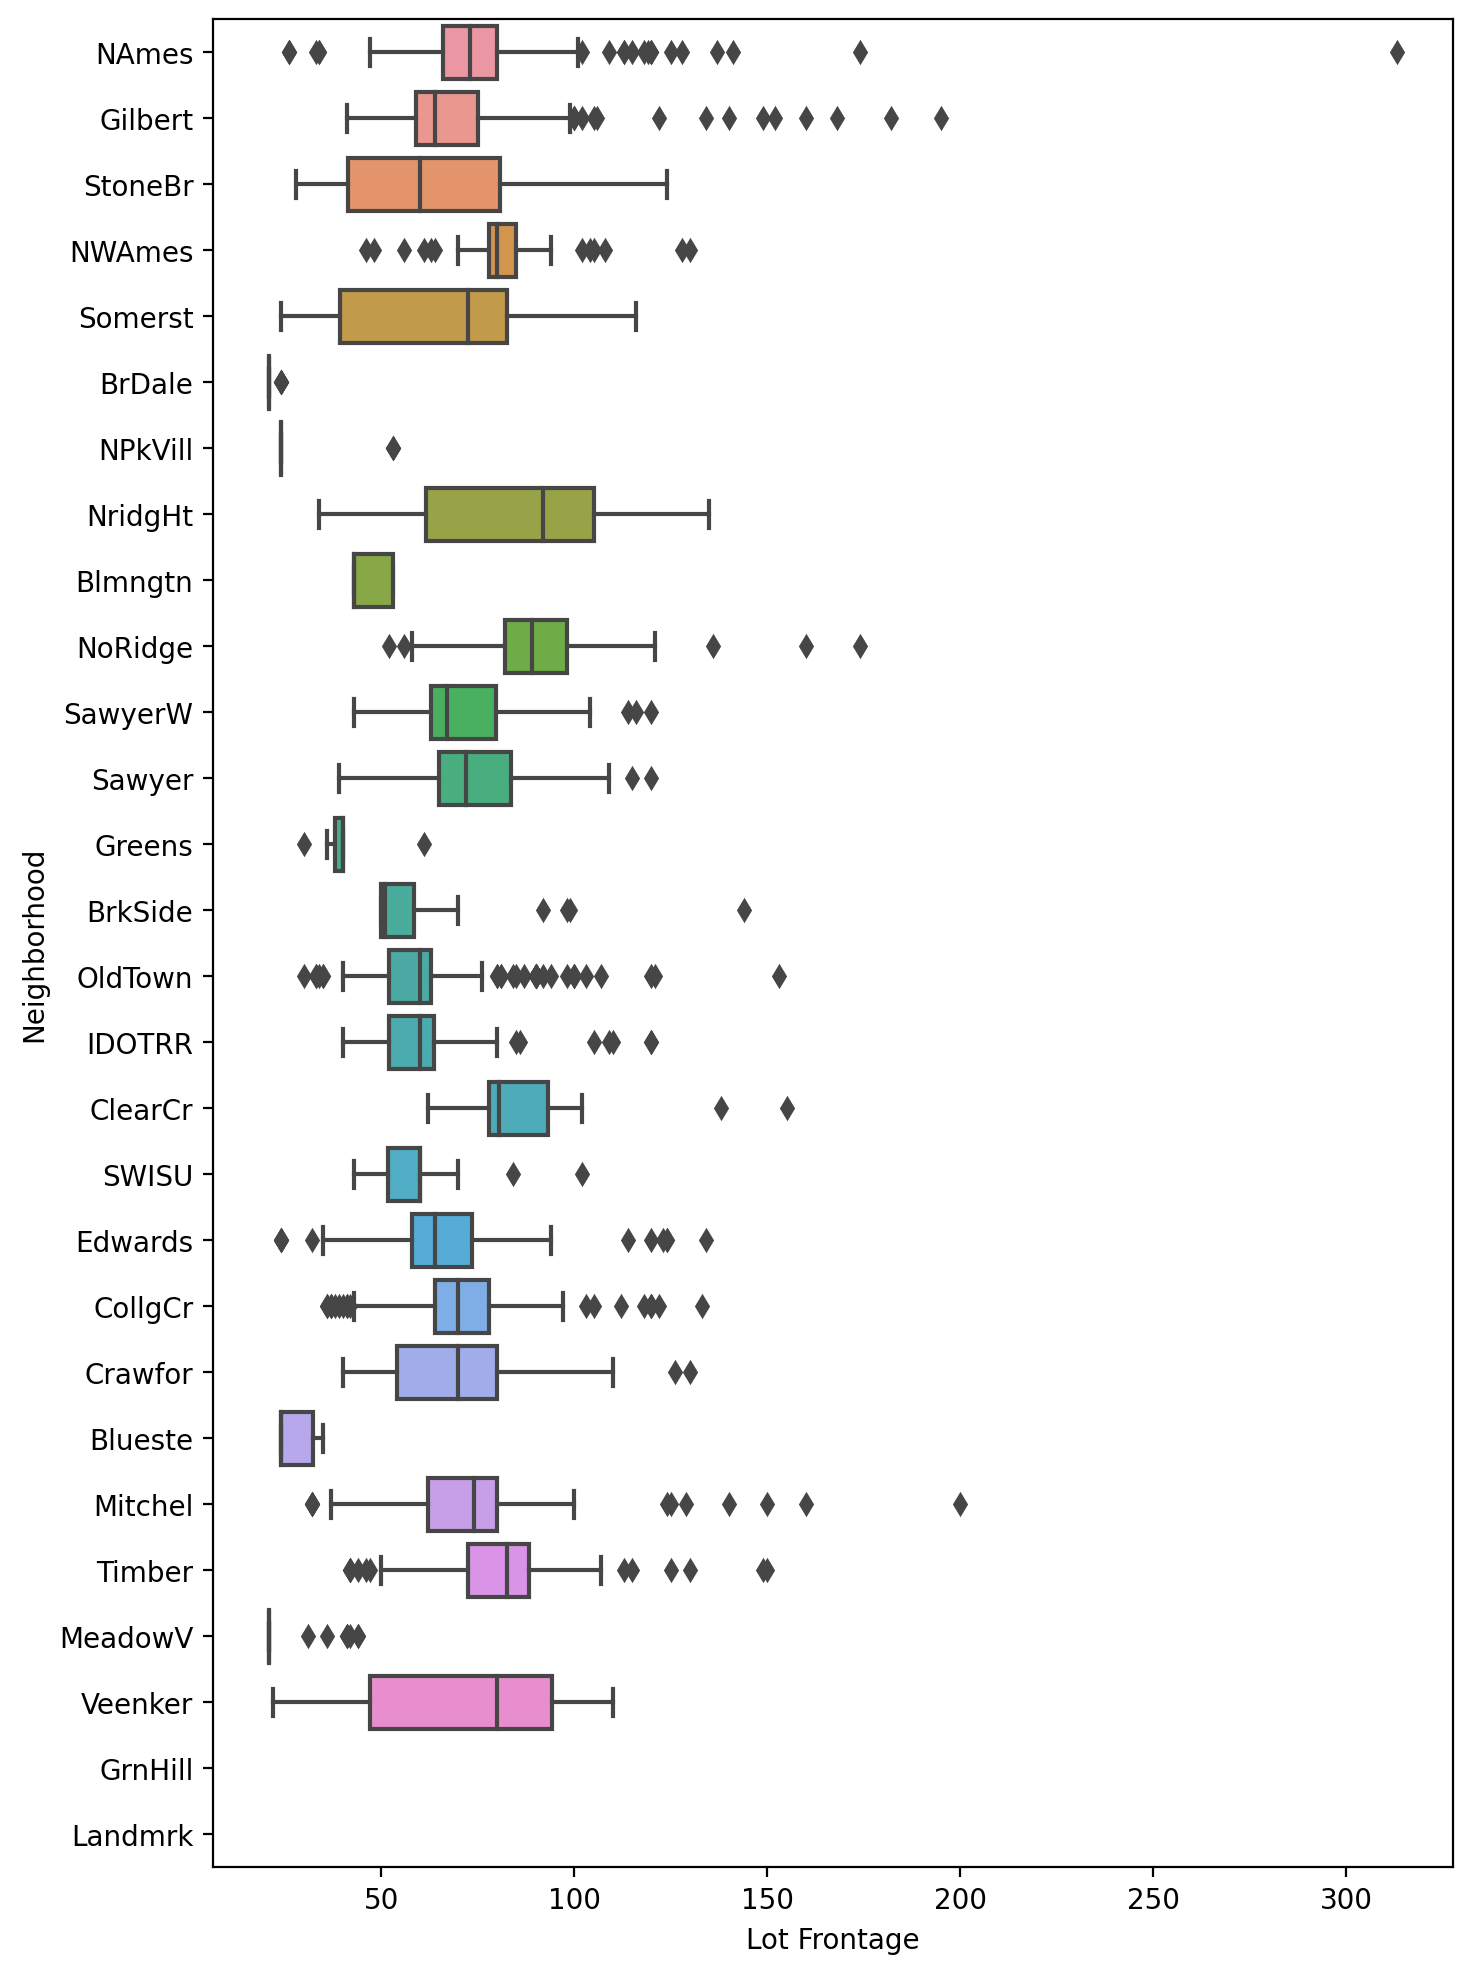

In [48]:
plt.figure(figsize=(8,12),dpi=200)
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient ='h')

In [49]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [50]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value:value.fillna(value.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [51]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value:value.fillna(value.mean()))

In [53]:
df.isnull().sum()

Unnamed: 0        0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      3
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 78, dtype: int64

In [54]:
 df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [55]:
df.isnull().sum()

Unnamed: 0        0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 78, dtype: int64

In [58]:
percent_nan = percent_missing(df)

